# HW5 Coding Part

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import TensorDataset, DataLoader, random_split
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

## Problem 0: Pytorch Tutorial (12 points)

### Tensors
Tensors can be created from numpy data or by using pytorch directly.

In [2]:
x_data = [[1, 2], [3, 4]]
x = torch.tensor(x_data)

np_array = np.array(x_data)
x_np = torch.from_numpy(np_array)

shape = (2,3)
rand_tensor = torch.rand(shape)
np_rand_array = rand_tensor.numpy()

print(f"Tensor from np: \n {x_np} \n")
print(f"Rand Tensor: \n {rand_tensor} \n")
print(f"Rand Numpy Array: \n {np_rand_array} \n")

Tensor from np: 
 tensor([[1, 2],
        [3, 4]]) 

Rand Tensor: 
 tensor([[0.2064, 0.2296, 0.4047],
        [0.0165, 0.9449, 0.9130]]) 

Rand Numpy Array: 
 [[0.20640677 0.2295981  0.4047187 ]
 [0.0165236  0.9449377  0.913017  ]] 



#### 1) Tensor squeezing, unsqueezing and viewing (3 points)

Tensor squeezing, unsqueezing and viewing are important methods to change the dimension of a Tensor, and the corresponding functions are [torch.squeeze](https://pytorch.org/docs/stable/torch.html#torch.squeeze), [torch.unsqueeze](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze) and [torch.Tensor.view](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view). Please read the documents of the functions, and finish the following practice.

In [3]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2],[3, 4],[5, 6]])
print("Original shape:", x.shape)  # Should be (3, 2)

############## YOUR CODE HERE ##############
# Add two new dimensions to x by using the function torch.unsqueeze(input, dim) -> Tensor, so that the size of x becomes (3, 1, 2, 1).
# Hint: Add dimension at position 1 (second dimension)
# Hint: Add dimension at position 3 (fourth dimension)
x = torch.unsqueeze(x, 1)
x = torch.unsqueeze(x, 3)
############## END YOUR CODE ##############
print(x.shape) # Should be torch.Size([3, 1, 2, 1])

############## YOUR CODE HERE ##############
# Remove the two dimensions just added by using the function torch.squeeze(input, dim) -> Tensor, and change the size of x back to (3, 2).
# Hint: Remove the dimension at position 3
# Hint: Remove the dimension at position 1
x = torch.squeeze(x, 3)
x = torch.squeeze(x, 1)
############## END YOUR CODE ##############
print(x.shape) # Should be torch.Size([3, 2])

############## YOUR CODE HERE ##############
# x is now a two-dimensional tensor, or in other words a matrix. Now use the function torch.Tensor.view(*shape) and change x to a one-dimensional vector with size being (6).
x = x.view(6)
############## END YOUR CODE ##############
print("After view:", x.shape)  # Should be torch.Size([6])

Original shape: torch.Size([3, 2])
torch.Size([3, 1, 2, 1])
torch.Size([3, 2])
After view: torch.Size([6])


### 2) Tensor concatenation and stack (2 points)

Tensor concatenation and stack are operations to combine small tensors into big tensors. The corresponding functions are [torch.cat](https://pytorch.org/docs/stable/torch.html#torch.cat) and [torch.stack](https://pytorch.org/docs/stable/torch.html#torch.stack). Please read the documents of the functions, and finish the following practice.

**Hints:**<br>
1. `torch.stack((obj1, obj2))`: A new dimension is automatically added (dim=0 by default) and the input tensors are then stacked along that dimension.
2. `torch.cat((obj1, obj2))`: Dimensions are not added, but are spliced directly over existing dimensions, you should consider this case.

In [4]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])

# y is a tensor with size being (3, 2)
y = torch.Tensor([[-1, -2], [-3, -4], [-5, -6]])

############## YOUR CODE HERE ##############
# Our goal is to generate a tensor z with size as (2, 3, 2), and z[0,:,:] = x, z[1,:,:] = y. Use torch.stack to generate such a z
z = torch.stack((x, y))
############## END YOUR CODE ##############
print(z)

############## YOUR CODE HERE ##############
# Use torch.cat and torch.unsqueeze to generate z
z = torch.cat((torch.unsqueeze(x, 0), torch.unsqueeze(y, 0)))
############## END YOUR CODE ##############
print(z)

# The tow outputs are expected to be tensor([[[ 1.,  2.], [ 3.,  4.], [ 5.,  6.]], [[-1., -2.], [-3., -4.], [-5., -6.]]])

tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[-1., -2.],
         [-3., -4.],
         [-5., -6.]]])
tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[-1., -2.],
         [-3., -4.],
         [-5., -6.]]])


#### 3) Tensor expansion (2 points)

Tensor expansion is to expand a tensor into a larger tensor along singleton dimensions. The corresponding functions are [torch.Tensor.expand](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand) and [torch.Tensor.expand_as](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand_as). Please read the documents of the functions, and finish the following practice.

In [5]:
# x is a tensor with size being (3)
x = torch.Tensor([1, 2, 3])

# Our goal is to generate a tensor z with size (2, 3), so that z[0,:,:] = x, z[1,:,:] = x.

############## YOUR CODE HERE ##############
# Change the size of x into (1, 3) by using torch.unsqueeze.
x = torch.unsqueeze(x, 0)
############## END YOUR CODE ##############
print(x) # Output is expected to be tensor([[1., 2., 3.]])

############## YOUR CODE HERE ##############
# Then expand the new tensor to the target tensor by using torch.Tensor.expand.
z = x.expand(2, -1)
############## END YOUR CODE ##############
print(z) # Output is expected to be tensor([[1., 2., 3.], [1., 2., 3.]])

tensor([[1., 2., 3.]])
tensor([[1., 2., 3.],
        [1., 2., 3.]])


#### 4) Tensor reduction in a given dimension (5 points)

In deep learning, we often need to compute the mean/sum/max/min value in a given dimension of a tensor. Please read the document of [torch.mean](https://pytorch.org/docs/stable/torch.html#torch.mean), [torch.sum](https://pytorch.org/docs/stable/torch.html#torch.sum), [torch.max](https://pytorch.org/docs/stable/torch.html#torch.max), [torch.min](https://pytorch.org/docs/stable/torch.html#torch.min), [torch.topk](https://pytorch.org/docs/stable/torch.html#torch.topk), and finish the following practice.

In [6]:
# x is a random tensor with size being (10, 50)
x = torch.randn(10, 50)

############## YOUR CODE HERE ##############
# Compute the mean value for each row of x.
# You need to generate a tensor x_mean of size (10), and x_mean[k, :] is the mean value of the k-th row of x.
# dim = 1: eliminate the second(1)'s dimension
x_mean = torch.mean(x, dim=1)
############## END YOUR CODE ##############
print(x_mean.shape)

############## YOUR CODE HERE ##############
# Compute the sum value for each row of x.
# You need to generate a tensor x_sum of size (10).
x_sum = torch.sum(x, dim=1)
############## END YOUR CODE ##############
print(x_sum.shape)

############## YOUR CODE HERE ##############
# Compute the max value for each row of x.
# You need to generate a tensor x_max of size (10).
# Hint: torch.max() -> (max_val, indices)
(x_max, indices) = torch.max(x, dim=1)
############## END YOUR CODE ##############
print(x_max.shape)

############## YOUR CODE HERE ##############
# Compute the min value for each row of x.
# You need to generate a tensor x_min of size (10).
# Hint: torch.max() -> (min_val, indices)
(x_min, indices) = torch.min(x, dim=1)
print(x_min.shape)
############## END YOUR CODE ##############

############## YOUR CODE HERE ##############
# Compute the top-5 values for each row of x.
# You need to generate a tensor x_min of size (10. 5).
# Hint: torch.max() -> (min_val, indices)
(x_xtop, indices) = torch.topk(x, k=5, dim=1)
print((x_xtop.shape))
############## END YOUR CODE ##############

torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([10, 5])


### Autograd (0 point) (Highly recommend checking it out)
This small section shows you how pytorch computes gradients. When we create tenors, we can set `requires_grad` to be true to indicate that we are using gradients. For most of the work that you actually do, you will use the `nn` package, which automatically sets all parameter tensors to have `requires_grad=True`.

In [7]:
# Below is an example of computing the gradient for a single data point in logistic regression using pytorch's autograd.

x = torch.ones(5)  # input tensor
y = torch.zeros(1)  # label
# requires_grad = True : we are using this parameter's gradient
# use nn package, set all parameter tensors to have required_grad = True
w = torch.randn(5, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
pred = torch.sigmoid(torch.matmul(x, w) + b)
loss = torch.nn.functional.binary_cross_entropy(pred, y)
loss.backward()  # Computers gradients
print("W gradient:", w.grad)
print("b gradient:", b.grad)

# when we want to actually take an update step, we can use optimizers:
optimizer = torch.optim.SGD([w, b], lr=0.1)  # [w,b] is the model.parameters()
print("Weight before", w)
optimizer.step()  # use the computed gradients to update
# Print updated weights
print("Updated weight", w)

# Performing operations with gradients enabled is slow...
# You can disable gradient computation using the following enclosure:
with torch.no_grad():
    # Perform operations without gradients
    ...

W gradient: tensor([[0.0277],
        [0.0277],
        [0.0277],
        [0.0277],
        [0.0277]])
b gradient: tensor([0.0277])
Weight before tensor([[ 1.5007],
        [-2.2757],
        [-2.4327],
        [ 0.3681],
        [-0.4420]], requires_grad=True)
Updated weight tensor([[ 1.4979],
        [-2.2784],
        [-2.4355],
        [ 0.3654],
        [-0.4448]], requires_grad=True)


### Devices (0 point) (Highly recommend checking it out)

Pytorch supports accelerating computation using GPUs which are available on google colab. To use a GPU on google colab, go to runtime -> change runtime type -> select GPU.

Note that there is some level of strategy for knowing when to use which runtime type. Colab will kick users off of GPU for a certain period of time if you use it too much. Thus, its best to run simple models and prototype to get everything working on CPU, then switch the instance type over to GPU for training runs and parameter tuning.

Its best practice to make sure your code works on any device (GPU or CPU) for pytorch, but note that numpy operations can only run on the CPU. Here is a standard flow for using GPU acceleration:

In [8]:
# Determine the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)
# Next create your tensors
tensor = torch.zeros(4, 4, requires_grad=True)
# Move the tensor to the device you want to use
tensor = tensor.to(device)

# Perform whatever operations you want.... (often this will involve gradients)
# These operations will be accelerated by GPU.
tensor = 10*(tensor + 1)

# bring the tensor back to CPU, first detaching it from any gradient computations
tensor = tensor.detach().cpu()

# Convert to numpy if you want to perform numpy operations.
tensor_np = tensor.numpy()

Using device cuda


### Build an NN (0 point) (Highly recommend checking it out)
Pytorch implements composable blocks in `Module` classes. All layers and modules in pytorch inherit from `nn.Module`. When you make a module you need to implement two functions: `__init__(self, *args, **kwargs)` and `foward(self, *args, **kwargs)`. Modules also have some nice helper functions, namely `parameters` which will recursively return all of the parameters. Here is an example of a logistic regression model:

In [9]:
class Perceptron(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        # This is a linear layer, it computes Xw + b
        self.layer = nn.Linear(in_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.layer(x)).squeeze(-1)


perceptron = Perceptron(10)
# Move all the perceptron's tensors to the device
perceptron = perceptron.to(device)
# module.parameters() return all the parameters in this module ; There W and b
print("Parameters", list(perceptron.parameters()))

Parameters [Parameter containing:
tensor([[-0.0347, -0.1116,  0.1682, -0.3091, -0.1193, -0.0733,  0.0937,  0.0166,
          0.1066,  0.0793]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.0771], device='cuda:0', requires_grad=True)]


### Datasets (0 point) (Highly recommend checking it out)
Pytorch has nice interfaces for using datasets. Suppose we create a logistic regression dataset as follows:

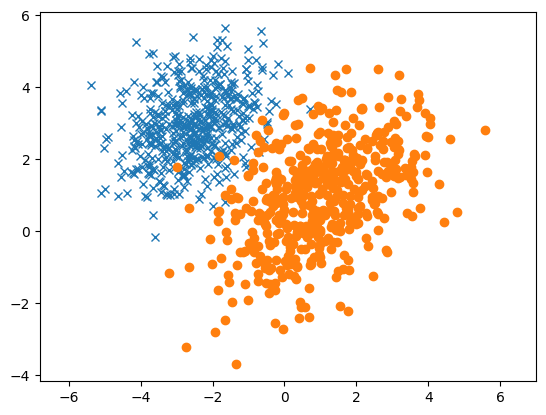

In [10]:
c1_x1, c1_x2 = np.random.multivariate_normal(
    [-2.5, 3], [[1, 0.3], [0.3, 1]], 500).T
c2_x1, c2_x2 = np.random.multivariate_normal([1, 1], [[2, 1], [1, 2]], 500).T
c1_X = np.vstack((c1_x1, c1_x2)).T
c2_X = np.vstack((c2_x1, c2_x2)).T
X = np.concatenate((c1_X, c2_X))
y = np.concatenate((np.zeros(500), np.ones(500)))
# Shuffle the data
permutation = np.random.permutation(X.shape[0])
X = X[permutation, :]
y = y[permutation]
# Plot the data
plt.plot(c1_x1, c1_x2, 'x')
plt.plot(c2_x1, c2_x2, 'o')
plt.axis('equal')
plt.show()

We can then create a pytorch dataset object as follows. Often times, the default pytorch datasets will create these objects for you. Then, we can apply dataloaders to iterate over the dataset in batches.

In [11]:
dataset = torch.utils.data.TensorDataset(
    torch.from_numpy(X), torch.from_numpy(y))
print(dataset)
# We can create a dataloader that iterates over the dataset in batches.
dataloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)
for x, y in dataloader:
    print("Batch x:", x)
    print("Batch y:", y)
    break

# Clean up the dataloader as we make a new one later, you can ignore it here
del dataloader

Batch x: tensor([[-3.0235,  3.5044],
        [-3.9444,  2.7082],
        [ 2.8794,  1.6740],
        [-3.5330,  4.1283],
        [-3.4502,  2.8050],
        [-0.1827,  4.6417],
        [-1.9015,  3.0615],
        [-3.0099,  2.7623],
        [ 2.6067,  1.6649],
        [-1.8160,  2.8783]], dtype=torch.float64)
Batch y: tensor([0., 0., 1., 0., 0., 0., 0., 0., 1., 0.], dtype=torch.float64)


Splitting Train, Validation and Test sets randomly.

In [12]:
#Training: 70%, Validation: 15%, Testing: 15%
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    dataset, [train_size, val_size, test_size]
)

# Creat the data_loders
batch_size = 10
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, shuffle=False)
test_loader = DataLoader(test_dataset, shuffle=False)

print(f"Training size: {len(train_dataset)}")
print(f"Validation size: {len(val_dataset)}")
print(f"Testing size: {len(test_dataset)}")

Training size: 700
Validation size: 150
Testing size: 150


### <font color='red'>Training Loop and Progress Bar (0 point) (Very important! Highly recommend checking it out)</font>

Here is an example of training a full Logistic Regression model in pytorch. Note the extensive use of modules -- modules can be used for storing networks, computation steps etc.

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)

epochs = 10
batch_size = 10
learning_rate = 0.01

num_features = dataset[0][0].shape[0]
model = Perceptron(num_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = torch.nn.BCELoss()

model.train()  # Put model in training mode
for epoch in range(epochs):
    training_losses = []
    train_correct = 0
    ProgressBar = tqdm(train_loader)
    for x, y in ProgressBar:
        x, y = x.float().to(device), y.float().to(device)
        #  for every mini-batch during the training phase, we typically want to explicitly set the gradients to zero before starting to do backpropagation
        # Remove the gradients from the previous step ;Sets the gradients of all optimized torch.Tensor s to zero.
        optimizer.zero_grad()
        pred = model(x)   # The value predicted using our model
        # compute loss
        loss = criterion(pred, y)
        # Compute gradients.
        loss.backward()
        # update the parameter using the gradient computed
        optimizer.step()
        training_losses.append(loss.item())
        # In a classification task, the output of a neural network model is typically the scores or probabilities for each class.
        # For example, in a 10-class classification task, the output of the last layer of the model is a tensor with the shape of (batch_size, 10). For each sample (i.e., each row in pred), we can obtain the predicted class index of each sample by using torch.argmax(pred, dim=1).
        # So for multi-class classification tasks, try to use: train_correct += torch.sum(torch.argmax(pred, dim=1) == y).item()
        train_correct += torch.sum(torch.round(pred) == y).item()
    train_accuracy = train_correct / len(train_dataset)
    val_losses = []
    num_correct = 0
    with torch.no_grad():
        model.eval()  # Put model in eval mode
        for x_val, y_val in val_loader:
            x_val, y_val = x_val.float().to(device), y_val.float().to(device)
            pred_val = model(x_val)
            loss_val = criterion(pred_val, y_val)
            val_losses.append(loss_val.item())
            num_correct += torch.sum(torch.round(pred_val) == y_val).item()
        model.train()  # Put model back in train mode
    print(  f"Epoch {epoch+1}/{epochs} | "
            f"Train Loss: {np.mean(training_losses):.4f} | "
            f"Train Acc: {train_accuracy:.4f} | "
            f"Val Loss: {np.mean(val_losses):.4f} | "
            f"Val Acc: {num_correct / len(val_dataset):.4f}")

# We can run predictions on the data to determine the Testing accuracy.
model.eval()
test_correct = 0
with torch.no_grad():
    for x, y in test_loader:
        x, y = x.float().to(device), y.float().to(device)
        pred = model(x)
        test_correct += torch.sum(torch.round(pred) == y).item()

print(f"\nTest Accuracy: {test_correct / len(test_dataset):.2%}")

Using device cuda


100%|██████████| 70/70 [00:00<00:00, 1293.73it/s]


Epoch 1/10 | Train Loss: 0.3939 | Train Acc: 0.8529 | Val Loss: 0.3430 | Val Acc: 0.9133


100%|██████████| 70/70 [00:00<00:00, 3099.74it/s]


Epoch 2/10 | Train Loss: 0.3009 | Train Acc: 0.9171 | Val Loss: 0.2979 | Val Acc: 0.9067


100%|██████████| 70/70 [00:00<00:00, 3031.60it/s]


Epoch 3/10 | Train Loss: 0.2727 | Train Acc: 0.9086 | Val Loss: 0.2767 | Val Acc: 0.9067


100%|██████████| 70/70 [00:00<00:00, 2770.69it/s]


Epoch 4/10 | Train Loss: 0.2563 | Train Acc: 0.9129 | Val Loss: 0.2619 | Val Acc: 0.9133


100%|██████████| 70/70 [00:00<00:00, 2424.15it/s]


Epoch 5/10 | Train Loss: 0.2440 | Train Acc: 0.9143 | Val Loss: 0.2503 | Val Acc: 0.9200


100%|██████████| 70/70 [00:00<00:00, 3193.23it/s]


Epoch 6/10 | Train Loss: 0.2339 | Train Acc: 0.9186 | Val Loss: 0.2405 | Val Acc: 0.9400


100%|██████████| 70/70 [00:00<00:00, 2874.30it/s]


Epoch 7/10 | Train Loss: 0.2253 | Train Acc: 0.9243 | Val Loss: 0.2320 | Val Acc: 0.9400


100%|██████████| 70/70 [00:00<00:00, 3044.87it/s]


Epoch 8/10 | Train Loss: 0.2176 | Train Acc: 0.9314 | Val Loss: 0.2244 | Val Acc: 0.9400


100%|██████████| 70/70 [00:00<00:00, 3388.40it/s]


Epoch 9/10 | Train Loss: 0.2108 | Train Acc: 0.9314 | Val Loss: 0.2176 | Val Acc: 0.9400


100%|██████████| 70/70 [00:00<00:00, 2921.26it/s]


Epoch 10/10 | Train Loss: 0.2047 | Train Acc: 0.9314 | Val Loss: 0.2114 | Val Acc: 0.9400

Test Accuracy: 93.33%


## Problem 1: MLP for FashionMNIST (18 points)

Now you will train a multi-layer perceptron model on the FashionMNIST dataset. Your deliverables are as follows:

1. Code for training an MLP on FashionMNIST.
2. A plot of the training and validation loss for at least 8 epochs.
3. A plot of the training and validation accuracy for each epoch, achieving a final validation accuracy of at least 82% by the end of the training.

Below we will create the training and validation datasets for you. It is on you to implement an MLP / Feed Forward neural network yourself. Please leverage the example training loop from above.

Here are some pytorch components that you should definitely use:
1. `nn.Linear`
2. Some activation: `nn.ReLU`, `nn.Tanh`, `nn.Sigmoid`, etc.
3. `nn.CrossEntropyLoss`

Here are some challenges that you will need to overcome:
1. The data is, by default, configured in image form, i.e. a (28 x 28) tensor per sample, instead of single feature vector. You will need to **reshape** it somewhere to feed it in as vector to the MLP. There are many ways of doing this according to **Problem 0**.
2. You need to write code for plotting.
3. You need to find the appropriate hyper-parameters to achieve good accuracy.

Your underlying model must be fully connected or "dense", and may not use any convolutions etc., but you can use anything in `torch.optim` or any layers in `torch.nn` besides `nn.Linear` that do not have weights.

In [14]:
# Creating the datasets
# feel free to modify this as you see fit.
transform = torchvision.transforms.ToTensor()

training_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform,
)

validation_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform,
)

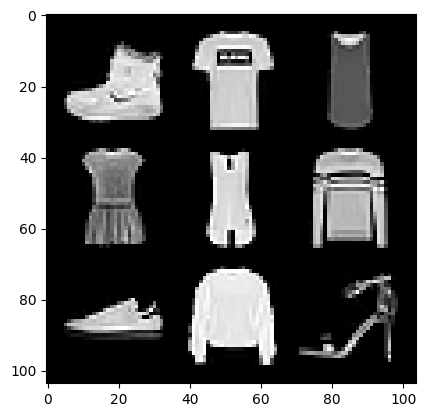

In [15]:
images = [training_data[i][0] for i in range(9)]
plt.imshow(torchvision.utils.make_grid(torch.stack(images), nrow=3, padding=5).numpy().transpose((1, 2, 0)))

In [16]:
# Get the knowledge of the Training and Validation Set
print("number of training samples: " + str(len(training_data)) + "\n" +
        "number of validation samples: " + str(len(validation_data)))
print("datatype of the 1st training sample: ", training_data[0][0].type())
print("size of the 1st training sample: ", training_data[0][0].size())

# Find out how many categories in the sample.
max_label = float("-inf")
min_label = float("inf")
for i in range(len(training_data)):
    if training_data[i][1] > max_label:
        max_label = training_data[i][1]
    if training_data[i][1] < min_label:
        min_label = training_data[i][1]
print("max_label = "+str(max_label))
print("min_label = "+str(min_label))

number of training samples: 60000
number of validation samples: 10000
datatype of the 1st training sample:  torch.FloatTensor
size of the 1st training sample:  torch.Size([1, 28, 28])
max_label = 9
min_label = 0


In the cell below, you'll implement a MLP. Please follow the guidence in comments. <br>
**Scoring criteria:**<br>
**1. Print out the train loss, train accuracy, validation loss, and validation accuracy for each epoch. (8 points)**<br>
**2. Grading criteria: <br>
At the last epoch, if the validation accuracy (validation_acc) of your model is greater than or equal to 0.86, you will get `10 points`. <br>
If 0.83 <= validation_acc < 0.86, you will get `6 points`. <br>
If 0.80 <= validation_acc < 0.83, you will get `4 points`. <br>
If validation_acc < 0.80, you will not get any score. <br>
You are free to use the *early stopping* strategy that can prevent overfitting.**

In [17]:
############## YOUR CODE HERE ##############
# 1. Confirm whether the CUDA is available or not.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)

# 2. Encapsulate your Multilayer Perceptron (MLP) model within a class.
# This class should include a constructor function __init__(...) and a forward(...) function that is used to carry out forward propagation.

class MLP(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.fc0 = nn.Linear(in_dim, 128)
        self.fc1 = nn.Linear(128, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, out_dim)
        self.activation_func = nn.ReLU()

    def forward(self, x):
        x = self.activation_func(self.fc0(x))
        x = self.activation_func(self.fc1(x))
        x = self.activation_func(self.fc2(x))
        x = self.activation_func(self.fc3(x))
        x = self.fc4(x)
        return x


# 3. Initialize your model with proper input size and output size
n_inputs = 28 * 28
n_outputs = 10
model = MLP(n_inputs, n_outputs).to(device)

# 4. Define the Training Parameters like epochs, batch_size, learning_rate, optimizer, criterion_loss, etc.
epochs = 10
batch_size = 32
learning_rate = 0.05
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# 5. Put the training and testing data into a DataLoader
# you can use torch.utils.data.DataLoader() to complete this step.
train_loader = torch.utils.data.DataLoader(
    training_data, batch_size=batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(
    validation_data, batch_size=batch_size, shuffle=True)

# 6. Training
# During the training process, make sure to add the training accuracy, validation accuracy, training loss, and validation loss to the list below.
# This will allow you to visualize these metrics and assess whether the model is overfitting.
train_acc = []
valid_acc = []
train_loss = []
valid_loss = []

model.train()  # Put model in training mode
for epoch in range(epochs):
    training_losses = []
    train_correct = 0
    ProgressBar = tqdm(train_loader)
    for images, labels in ProgressBar:
        images = images.view(-1, n_inputs).float().to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        pred = model(images)
        loss = criterion(pred, labels)
        loss.backward()
        optimizer.step()
        training_losses.append(loss.item())
        train_correct += torch.sum(torch.argmax(pred, dim=1) == labels).item()
    train_accuracy = train_correct / len(training_data)
    train_acc.append(train_accuracy)
    train_loss.append(np.mean(training_losses))

    val_losses = []
    num_correct = 0
    with torch.no_grad():
        model.eval()  # Put model in eval mode
        for images, labels in validation_loader:
            images = images.view(-1, n_inputs).float().to(device)
            labels = labels.to(device)
            pred_val = model(images)
            loss_val = criterion(pred_val, labels)
            val_losses.append(loss_val.item())
            num_correct += torch.sum(torch.argmax(pred_val, dim=1) == labels).item()
        model.train()  # Put model back in train mode
    valid_accuracy = num_correct / len(validation_data)
    valid_acc.append(valid_accuracy)
    valid_loss.append(np.mean(val_losses))

    print(f"Epoch {epoch + 1}/{epochs} | Train Loss: {np.mean(training_losses):.4f} | Train Acc: {train_accuracy:.4f} | Val Loss: {np.mean(val_losses):.4f} | Val Acc: {valid_accuracy:.4f}")

Using device cuda


100%|██████████| 1875/1875 [00:02<00:00, 743.40it/s]


Epoch 1/10 | Train Loss: 0.8922 | Train Acc: 0.6672 | Val Loss: 0.5317 | Val Acc: 0.8113


100%|██████████| 1875/1875 [00:02<00:00, 756.88it/s]


Epoch 2/10 | Train Loss: 0.4622 | Train Acc: 0.8323 | Val Loss: 0.4435 | Val Acc: 0.8427


100%|██████████| 1875/1875 [00:02<00:00, 754.30it/s]


Epoch 3/10 | Train Loss: 0.3969 | Train Acc: 0.8549 | Val Loss: 0.4039 | Val Acc: 0.8517


100%|██████████| 1875/1875 [00:02<00:00, 758.10it/s]


Epoch 4/10 | Train Loss: 0.3634 | Train Acc: 0.8662 | Val Loss: 0.3802 | Val Acc: 0.8594


100%|██████████| 1875/1875 [00:02<00:00, 732.73it/s]


Epoch 5/10 | Train Loss: 0.3408 | Train Acc: 0.8748 | Val Loss: 0.3949 | Val Acc: 0.8597


100%|██████████| 1875/1875 [00:02<00:00, 754.02it/s]


Epoch 6/10 | Train Loss: 0.3249 | Train Acc: 0.8795 | Val Loss: 0.3661 | Val Acc: 0.8687


100%|██████████| 1875/1875 [00:02<00:00, 764.32it/s]


Epoch 7/10 | Train Loss: 0.3094 | Train Acc: 0.8865 | Val Loss: 0.3756 | Val Acc: 0.8650


100%|██████████| 1875/1875 [00:02<00:00, 764.55it/s]


Epoch 8/10 | Train Loss: 0.2970 | Train Acc: 0.8899 | Val Loss: 0.3576 | Val Acc: 0.8706


100%|██████████| 1875/1875 [00:02<00:00, 759.80it/s]


Epoch 9/10 | Train Loss: 0.2875 | Train Acc: 0.8919 | Val Loss: 0.3519 | Val Acc: 0.8728


100%|██████████| 1875/1875 [00:02<00:00, 745.55it/s]


Epoch 10/10 | Train Loss: 0.2765 | Train Acc: 0.8969 | Val Loss: 0.3535 | Val Acc: 0.8724


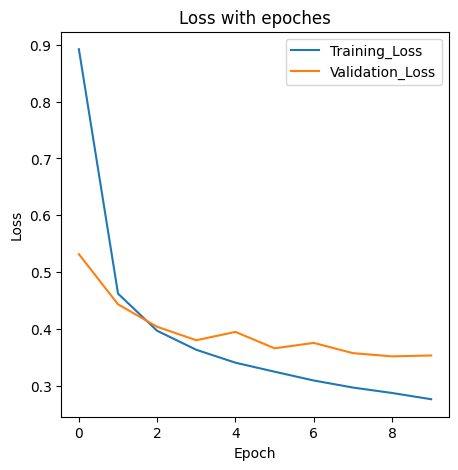

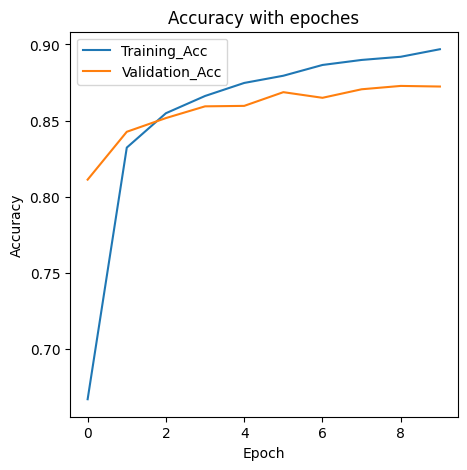

In [18]:
# plot
plt.figure(figsize=(5, 5))
plt.plot(train_loss, label='Training_Loss')
plt.plot(valid_loss, label='Validation_Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss with epoches")
plt.legend()
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(train_acc, label='Training_Acc')
plt.plot(valid_acc, label='Validation_Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy with epoches")
plt.legend()
plt.show()

## Problem 2: CNN for CIFAR-10 (20 points)

In this section, you will construct a Convolutional Neural Network (CNN) for the CIFAR - 10 dataset. You have already utilized this dataset in the coding part of Homework 2. However, in this particular part, there is no need to download the dataset separately. It is advisable to employ GPU acceleration for this section to enhance the operational efficiency. Nevertheless, this is not a mandatory requirement.

Here are some of the components you should consider using:
1. `nn.Conv2d`
2. `nn.ReLU`
3. `nn.Linear`
4. `nn.CrossEntropyLoss`
5. `nn.MaxPooling2d` (Optional, many implementations without it exist)

We encourage you to explore different ways of improving your model to obtain higher accuracies. Here are some suggestions for things to look into:
1. Popular CNN architectures like ResNets, etc.
2. Different optimizers and their parameters (see `torch.optim`)
3. Image preprocessing / data augmentation (see `torchvision.transforms`)
4. Regularization or dropout (see `torch.optim` and `torch.nn` respectively)
5. Learning rate scheduling: https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
6. Weight initialization: https://pytorch.org/docs/stable/nn.init.html

Though we encourage you to explore, there are some rules:
1. You are not allowed to use any pre-defined architectures or feature extractors in your network.
2. You are not allowed to use **any** pretrained weights, i.e. no transfer learning.
3. You cannot train on the test data (that would pretty much defeat the whole point of machine learning).

<font color='red'>Scoring Criteria:</font>
1. The final test accuracy of your model should be $\geq 0.80$ to obtain **10 points**.<br>
If $0.7\leq$ test_acc $< 0.8$, you will get **5 points**. <br>
 If test_acc $< 0.7$, no score will be awarded.
2. Print out the train loss, train accuracy, validation loss, and validation accuracy for each epoch.**(5 points)**
3. Provide at least one training curve for your model. This curve should depict the training loss and validation loss per epoch or step after training for at least 10 epochs. **(5 points)**

In [19]:
# Creating the datasets, feel free to change this as long as you do the same to the test data.
# You can also modify this to split the data into training and validation.
# See https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split

# This transform already transform the image data from 0-255 to 0-1
import torch
import torchvision
import torchvision.transforms as transforms

# Training and Validation transforms
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Testing transform
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Training and validation data
train_val_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform_train,
)

# 9:1 randomly split the original training set to training and validation set
generator = torch.Generator().manual_seed(42)
train_data, valid_data = torch.utils.data.random_split(
    train_val_data,
    [0.9, 0.1],
    generator=generator
)

# Official testing set.
test_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform_test,
)

print(f"Training size: {len(train_data)}")
print(f"Validation size: {len(valid_data)}")
print(f"Testing size: {len(test_data)}")

Training size: 45000
Validation size: 5000
Testing size: 10000


Again, let's first visualize our data.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.7537313].


torch.Size([3, 32, 32])


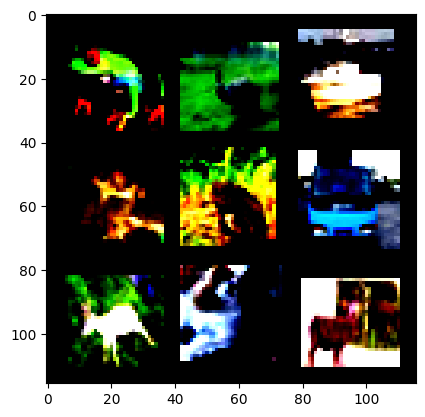

In [20]:
images = [train_data[i][0] for i in range(9)]
print(images[0].size())
plt.imshow(torchvision.utils.make_grid(torch.stack(images), nrow=3, padding=5).numpy().transpose((1, 2, 0)))

In [21]:
print("number of training samples: " + str(len(train_data)) + "\n" + "number of testing samples: " + str(len(valid_data)))
print("datatype of the 1st training sample: ", train_data[0][0].type())
print("size of the 1st training sample: ", train_data[0][0].size())

number of training samples: 45000
number of testing samples: 5000
datatype of the 1st training sample:  torch.FloatTensor
size of the 1st training sample:  torch.Size([3, 32, 32])


In [22]:
max_label = float("-inf")
min_label = float("inf")
for i in range(len(train_data)):
    if train_data[i][1] > max_label:
        max_label = train_data[i][1]
    if train_data[i][1] < min_label:
        min_label = train_data[i][1]
print("max_label = "+str(max_label))
print("min_label = "+str(min_label))

max_label = 9
min_label = 0


### CNN Construction and Training

In [23]:
# 1. Confirm whether the CUDA is available or not.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)

# 2. Encapsulate your Convolutional Neural Network (CNN) model within a class.
# This class should include a constructor function __init__(...) and a forward(...) function that is used to carry out forward propagation.
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # 3: input channels 64: number of filters 3:kernel size; output_size = 64x30x30
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv1_after = nn.Conv2d(
            32, 81, kernel_size=3, stride=1, padding=1)
        # 3: kernel size (square); output_size_1 = 6x14x14; output_size_2 = 12x5x5
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(81, 256, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.2)
        self.dropout2 = nn.Dropout(p=0.3)
        self.dropout3 = nn.Dropout(p=0.4)
        self.dropout4 = nn.Dropout(p=0.5)
        self.linear1 = nn.Linear(8 * 8 * 256, 8 * 8 * 8)
        self.linear2 = nn.Linear(8 * 8 * 8, 8 * 8)
        self.linear3 = nn.Linear(8 * 8, 10)

    def forward(self, x):
        x = self.relu(self.conv1_after(self.relu(self.conv1(x))))
        x = self.maxpool(x)
        x = self.dropout1(x)
        x = self.relu(self.conv3(x))
        x = self.maxpool(x)
        x = self.dropout2(x)
        x = x.view(-1, 256 * 8 * 8)
        x = self.relu(self.linear1(x))
        x = self.dropout3(x)
        x = self.relu(self.linear2(x))
        x = self.dropout4(x)
        x = self.linear3(x)
        return x


# 3. Initialize your model
model = CNN().to(device)

# 4. Define the Training Parameters like epochs, batch_size, learning_rate, optimizer, criterion_loss, etc.
epochs = 40
batch_size = 30
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
criterion = torch.nn.CrossEntropyLoss()

# 5. Put the training and testing data into a DataLoader
# you can use torch.utils.data.DataLoader() to complete this step.
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(
    valid_data, batch_size=batch_size, shuffle=True)

# 6. Training
# During the training process, make sure to add the training accuracy, validation accuracy, training loss, and validation loss to the list below.
# This will allow you to visualize these metrics and assess whether the model is overfitting.
train_acc = []
valid_acc = []
train_loss = []
valid_loss = []

model.train()  # Put model in training mode
for epoch in range(epochs):
    training_losses = []
    train_correct = 0
    ProgressBar = tqdm(train_loader)
    for images, labels in ProgressBar:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        pred = model(images)
        loss = criterion(pred, labels)
        loss.backward()
        optimizer.step()
        training_losses.append(loss.item())
        train_correct += torch.sum(torch.argmax(pred, dim=1) == labels).item()
    train_accuracy = train_correct / len(train_data)
    train_acc.append(train_accuracy)
    train_loss.append(np.mean(training_losses))

    val_losses = []
    num_correct = 0
    with torch.no_grad():
        model.eval()  # Put model in eval mode
        for images, labels in validation_loader:
            images = images.to(device)
            labels = labels.to(device)
            pred_val = model(images)
            loss_val = criterion(pred_val, labels)
            val_losses.append(loss_val.item())
            _, predicted = torch.max(pred_val.data, 1)
            num_correct += (predicted == labels).sum().item()
        model.train()  # Put model back in train mode
    valid_accuracy = num_correct / len(valid_data)
    valid_acc.append(valid_accuracy)
    valid_loss.append(np.mean(val_losses))

    print(f"Epoch {epoch + 1}/{epochs} | Train Loss: {np.mean(training_losses):.4f} | Train Acc: {train_accuracy:.4f} | Val Loss: {np.mean(val_losses):.4f} | Val Acc: {valid_accuracy:.4f}")

Using device cuda


100%|██████████| 1500/1500 [00:06<00:00, 224.17it/s]


Epoch 1/40 | Train Loss: 2.1260 | Train Acc: 0.2093 | Val Loss: 1.9297 | Val Acc: 0.3060


100%|██████████| 1500/1500 [00:06<00:00, 228.00it/s]


Epoch 2/40 | Train Loss: 1.8544 | Train Acc: 0.3123 | Val Loss: 1.7199 | Val Acc: 0.3682


100%|██████████| 1500/1500 [00:06<00:00, 227.85it/s]


Epoch 3/40 | Train Loss: 1.6969 | Train Acc: 0.3719 | Val Loss: 1.5865 | Val Acc: 0.4306


100%|██████████| 1500/1500 [00:06<00:00, 230.06it/s]


Epoch 4/40 | Train Loss: 1.6016 | Train Acc: 0.4107 | Val Loss: 1.4794 | Val Acc: 0.4518


100%|██████████| 1500/1500 [00:06<00:00, 230.53it/s]


Epoch 5/40 | Train Loss: 1.5280 | Train Acc: 0.4423 | Val Loss: 1.3996 | Val Acc: 0.4880


100%|██████████| 1500/1500 [00:06<00:00, 228.48it/s]


Epoch 6/40 | Train Loss: 1.4568 | Train Acc: 0.4728 | Val Loss: 1.3346 | Val Acc: 0.5188


100%|██████████| 1500/1500 [00:06<00:00, 229.89it/s]


Epoch 7/40 | Train Loss: 1.3875 | Train Acc: 0.4985 | Val Loss: 1.2581 | Val Acc: 0.5450


100%|██████████| 1500/1500 [00:06<00:00, 229.56it/s]


Epoch 8/40 | Train Loss: 1.3157 | Train Acc: 0.5270 | Val Loss: 1.1873 | Val Acc: 0.5684


100%|██████████| 1500/1500 [00:06<00:00, 231.20it/s]


Epoch 9/40 | Train Loss: 1.2544 | Train Acc: 0.5550 | Val Loss: 1.1167 | Val Acc: 0.6056


100%|██████████| 1500/1500 [00:06<00:00, 229.12it/s]


Epoch 10/40 | Train Loss: 1.1963 | Train Acc: 0.5751 | Val Loss: 1.0479 | Val Acc: 0.6392


100%|██████████| 1500/1500 [00:06<00:00, 231.60it/s]


Epoch 11/40 | Train Loss: 1.1449 | Train Acc: 0.5967 | Val Loss: 1.0161 | Val Acc: 0.6428


100%|██████████| 1500/1500 [00:06<00:00, 229.97it/s]


Epoch 12/40 | Train Loss: 1.0980 | Train Acc: 0.6193 | Val Loss: 0.9592 | Val Acc: 0.6572


100%|██████████| 1500/1500 [00:06<00:00, 230.10it/s]


Epoch 13/40 | Train Loss: 1.0590 | Train Acc: 0.6335 | Val Loss: 0.9158 | Val Acc: 0.6796


100%|██████████| 1500/1500 [00:06<00:00, 228.40it/s]


Epoch 14/40 | Train Loss: 1.0235 | Train Acc: 0.6451 | Val Loss: 0.8664 | Val Acc: 0.6972


100%|██████████| 1500/1500 [00:06<00:00, 231.13it/s]


Epoch 15/40 | Train Loss: 0.9857 | Train Acc: 0.6586 | Val Loss: 0.8706 | Val Acc: 0.6958


100%|██████████| 1500/1500 [00:06<00:00, 227.68it/s]


Epoch 16/40 | Train Loss: 0.9650 | Train Acc: 0.6686 | Val Loss: 0.8265 | Val Acc: 0.7128


100%|██████████| 1500/1500 [00:06<00:00, 228.10it/s]


Epoch 17/40 | Train Loss: 0.9378 | Train Acc: 0.6798 | Val Loss: 0.8101 | Val Acc: 0.7218


100%|██████████| 1500/1500 [00:06<00:00, 231.34it/s]


Epoch 18/40 | Train Loss: 0.9158 | Train Acc: 0.6904 | Val Loss: 0.7659 | Val Acc: 0.7306


100%|██████████| 1500/1500 [00:06<00:00, 232.95it/s]


Epoch 19/40 | Train Loss: 0.8881 | Train Acc: 0.6971 | Val Loss: 0.7577 | Val Acc: 0.7324


100%|██████████| 1500/1500 [00:06<00:00, 229.33it/s]


Epoch 20/40 | Train Loss: 0.8738 | Train Acc: 0.7013 | Val Loss: 0.7513 | Val Acc: 0.7382


100%|██████████| 1500/1500 [00:06<00:00, 231.36it/s]


Epoch 21/40 | Train Loss: 0.8525 | Train Acc: 0.7115 | Val Loss: 0.7422 | Val Acc: 0.7350


100%|██████████| 1500/1500 [00:06<00:00, 233.44it/s]


Epoch 22/40 | Train Loss: 0.8366 | Train Acc: 0.7158 | Val Loss: 0.7141 | Val Acc: 0.7556


100%|██████████| 1500/1500 [00:06<00:00, 228.94it/s]


Epoch 23/40 | Train Loss: 0.8184 | Train Acc: 0.7228 | Val Loss: 0.7154 | Val Acc: 0.7514


100%|██████████| 1500/1500 [00:06<00:00, 230.25it/s]


Epoch 24/40 | Train Loss: 0.8054 | Train Acc: 0.7295 | Val Loss: 0.6909 | Val Acc: 0.7644


100%|██████████| 1500/1500 [00:06<00:00, 230.30it/s]


Epoch 25/40 | Train Loss: 0.7834 | Train Acc: 0.7371 | Val Loss: 0.6803 | Val Acc: 0.7630


100%|██████████| 1500/1500 [00:06<00:00, 232.11it/s]


Epoch 26/40 | Train Loss: 0.7724 | Train Acc: 0.7428 | Val Loss: 0.6677 | Val Acc: 0.7642


100%|██████████| 1500/1500 [00:06<00:00, 232.70it/s]


Epoch 27/40 | Train Loss: 0.7618 | Train Acc: 0.7429 | Val Loss: 0.6669 | Val Acc: 0.7574


100%|██████████| 1500/1500 [00:06<00:00, 230.94it/s]


Epoch 28/40 | Train Loss: 0.7477 | Train Acc: 0.7487 | Val Loss: 0.6511 | Val Acc: 0.7772


100%|██████████| 1500/1500 [00:06<00:00, 230.39it/s]


Epoch 29/40 | Train Loss: 0.7441 | Train Acc: 0.7525 | Val Loss: 0.6350 | Val Acc: 0.7758


100%|██████████| 1500/1500 [00:06<00:00, 230.43it/s]


Epoch 30/40 | Train Loss: 0.7235 | Train Acc: 0.7574 | Val Loss: 0.6183 | Val Acc: 0.7868


100%|██████████| 1500/1500 [00:06<00:00, 230.44it/s]


Epoch 31/40 | Train Loss: 0.7114 | Train Acc: 0.7629 | Val Loss: 0.6268 | Val Acc: 0.7784


100%|██████████| 1500/1500 [00:06<00:00, 231.31it/s]


Epoch 32/40 | Train Loss: 0.7033 | Train Acc: 0.7634 | Val Loss: 0.6164 | Val Acc: 0.7838


100%|██████████| 1500/1500 [00:06<00:00, 231.43it/s]


Epoch 33/40 | Train Loss: 0.6946 | Train Acc: 0.7692 | Val Loss: 0.6216 | Val Acc: 0.7814


100%|██████████| 1500/1500 [00:06<00:00, 232.15it/s]


Epoch 34/40 | Train Loss: 0.6826 | Train Acc: 0.7724 | Val Loss: 0.6142 | Val Acc: 0.7872


100%|██████████| 1500/1500 [00:06<00:00, 229.87it/s]


Epoch 35/40 | Train Loss: 0.6653 | Train Acc: 0.7804 | Val Loss: 0.5864 | Val Acc: 0.7986


100%|██████████| 1500/1500 [00:06<00:00, 230.97it/s]


Epoch 36/40 | Train Loss: 0.6649 | Train Acc: 0.7793 | Val Loss: 0.5897 | Val Acc: 0.7916


100%|██████████| 1500/1500 [00:06<00:00, 231.80it/s]


Epoch 37/40 | Train Loss: 0.6543 | Train Acc: 0.7828 | Val Loss: 0.5773 | Val Acc: 0.7972


100%|██████████| 1500/1500 [00:06<00:00, 230.80it/s]


Epoch 38/40 | Train Loss: 0.6504 | Train Acc: 0.7821 | Val Loss: 0.5745 | Val Acc: 0.7966


100%|██████████| 1500/1500 [00:06<00:00, 230.98it/s]


Epoch 39/40 | Train Loss: 0.6358 | Train Acc: 0.7872 | Val Loss: 0.5630 | Val Acc: 0.8076


100%|██████████| 1500/1500 [00:06<00:00, 230.83it/s]


Epoch 40/40 | Train Loss: 0.6310 | Train Acc: 0.7894 | Val Loss: 0.5647 | Val Acc: 0.8050


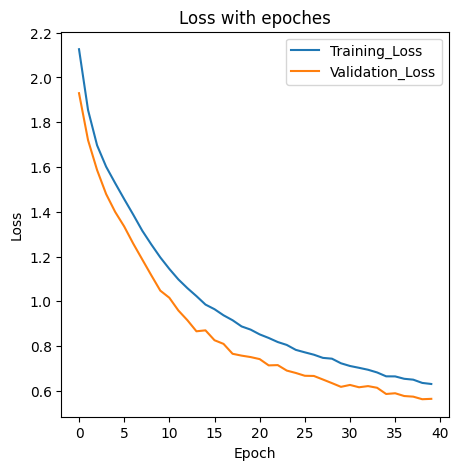

In [24]:
# Plot Your Training and Validation loss in one picture here.
plt.figure(figsize=(5, 5))
plt.plot(train_loss, label='Training_Loss')
plt.plot(valid_loss, label='Validation_Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss with epoches")
plt.legend()
plt.show()

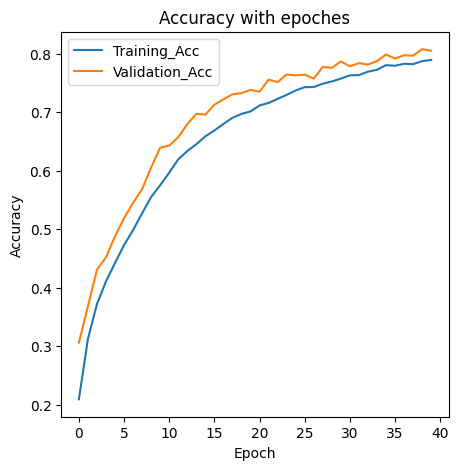

In [25]:
# Plot Your Training and Validation accuracy in one picture here.
plt.figure(figsize=(5, 5))
plt.plot(train_acc, label='Training_Acc')
plt.plot(valid_acc, label='Validation_Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy with epoches")
plt.legend()
plt.show()

## Testing

In [26]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
import numpy as np

def evaluate_model(model, test_data, device='cuda', batch_size=128):
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
    model.eval()
    model.to(device)
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = 100 * correct / total

    print(f'Test Accuracy: {accuracy:.2f}%')
    print(f'Correct/Total: {correct}/{total}')
    print('\nClassification Report:')
    print(classification_report(all_labels, all_preds, target_names=test_data.classes))

In [27]:
evaluate_model(model, test_data)

Test Accuracy: 82.23%
Correct/Total: 8223/10000

Classification Report:
              precision    recall  f1-score   support

    airplane       0.81      0.87      0.84      1000
  automobile       0.90      0.94      0.92      1000
        bird       0.76      0.72      0.74      1000
         cat       0.63      0.69      0.66      1000
        deer       0.81      0.80      0.81      1000
         dog       0.85      0.62      0.72      1000
        frog       0.83      0.89      0.86      1000
       horse       0.84      0.89      0.86      1000
        ship       0.87      0.93      0.90      1000
       truck       0.93      0.88      0.90      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

